In [2]:
import numpy as np
import math
import pickle
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib.gridspec as gs

# Load frame from pickle file, set variables, and print data.

In [4]:
fname = 'untitled.pickle'
with open(fname, 'rb') as f:
    d = pickle.load(f)

image = d['im'] # image array
zoom = d['im_crop'] # zoom array
residuals = d['im_res'] # residuals array

# x data
x = d['x']
x_slice = d['x_slice']
x_fit = d['x_fit']

# y data
y = d['y']
y_slice = d['y_slice']
y_fit = d['y_fit']

centroid = d['pxc'] # centroid array (x,y)

zoom_centre = d['zoom_centre'] # zoom centre array (x,y)
semimaj_angle = d['semimaj_angle'] # semimajor angle in deg
semimin_angle = d['semimin_angle'] # semiminor angle in deg
iso_level = d['iso_level'] # isocurve level value
im_fit = d['im_fit'] # isocurve data array

residual_LUT = d['residual_LUT'] # residual color map LUT

semimaj = d['semimaj'] # semimajor radius in px
semimin = d['semimin'] # semiminor radius in px
avg_radius = d['avg_radius'] # avg radius in px
x_radius = d['x_radius'] # x radius in px
y_radius = d['y_radius'] # y radius in px
ellipticity = d['e'] # ellipticity

exposure = d['exposure'] # camera exposure time in ms
px_width = d['px_width'] # pixel width in microns
residual_levels = d['residual_levels'] # limits for colorbar of residual image

print('\033[4mBeam Parameters [all radii are 1/e^2]\033[0m')
print('\nSemi-major radius: {:.1f}μm ({:.1f}px)'.format(semimaj*px_width, semimaj))
print('Semi-minor radius: {:.1f}μm ({:.1f}px)'.format(semimin*px_width, semimin))
print('Average radius: {:.1f}μm ({:.1f}px)'.format(avg_radius*px_width, avg_radius))
print('Ellipticity: {:.3f}'.format(ellipticity))
print('\nX radius: {:.1f}μm ({:.1f}px)'.format(x_radius*px_width, x_radius))
print('Y radius: {:.1f}μm ({:.1f}px)'.format(y_radius*px_width, y_radius))
print('\nX position: {:.1f}μm ({:.1f}px)'.format(centroid[0]*px_width, centroid[0]))
print('Y position: {:.1f}μm ({:.1f}px)'.format(centroid[1]*px_width, centroid[1]))
print('\nExposure time: {:.2f}ms'.format(exposure))

Beam Parameters [all radii are 1/e^2]

Semi-major radius: 2868.4μm (831.4px)
Semi-minor radius: 848.6μm (246.0px)
Average radius: 1560.2μm (452.2px)
Ellipticity: 0.704

X radius: 2839.7μm (823.1px)
Y radius: 940.4μm (272.6px)

X position: 2534.8μm (734.7px)
Y position: 1334.3μm (386.8px)

Exposure time: 0.04ms


# Recreate images and plots.

## Main image with slice and fit data

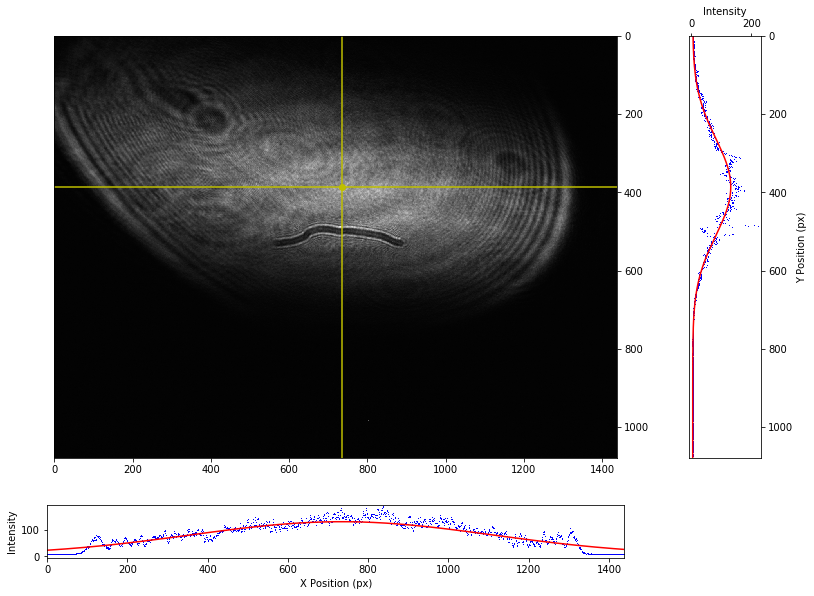

In [5]:
# Setting up the plot surface
fig = plt.figure(figsize =(12.8,9.6))
grid = gs.GridSpec(nrows=2, ncols=2, width_ratios=[8, 1], height_ratios=[8, 1])
# First axes
ax0 = fig.add_subplot(grid[0, 0])
ax0.imshow(np.transpose(image), cmap='gray')
ax0.axvline(centroid[0], color='y')
ax0.axhline(centroid[1], color='y')
ax0.plot(centroid[0], centroid[1], 'yo')
ax0.yaxis.set_ticks_position('right')
# Second axes
ax1 = fig.add_subplot(grid[1, 0], sharex=ax0)
ax1.plot(x, x_slice, 'b,')
ax1.plot(x, x_fit, 'r-')
ax1.set_xlim(np.min(x), np.max(x))
ax1.set_xlabel('X Position (px)')
ax1.set_ylabel('Intensity')
# Third axes
ax2 = fig.add_subplot(grid[0, 1], sharey=ax0)
ax2.plot(y_slice, y, 'b,')
ax2.plot(y_fit, y, 'r-')
ax2.set_ylim(np.max(y), np.min(y))
ax2.xaxis.set_ticks_position('top')
ax2.xaxis.set_label_position('top')
ax2.yaxis.set_ticks_position('right')
ax2.yaxis.set_label_position('right')
ax2.set_xlabel('Intensity')
ax2.set_ylabel('Y Position (px)')
plt.show()

## Zoom with 1/e^2 ellipse

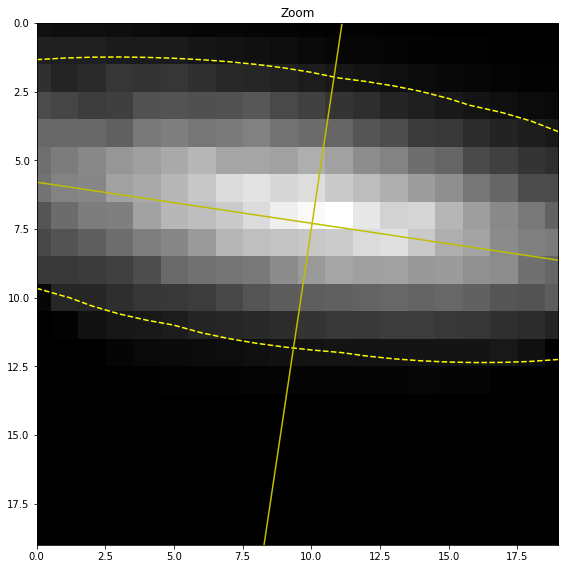

In [6]:
# Plot the zoom, along with 1/e^2 ellipse fit
plt.figure(figsize =(12.8,9.6))
plt.title('Zoom')
plt.imshow(np.transpose(zoom), cmap='gray')
semimaj_x = list(range(np.shape(zoom)[0]))
semimin_x = list(range(np.shape(zoom)[0]))
try:
    semimaj_slope = math.tan(math.radians(semimaj_angle))
    semimaj_y = semimaj_slope * (semimaj_x - zoom_centre[0]) + zoom_centre[1]
    plt.plot(semimaj_x, semimaj_y, 'y')
except ZeroDivisionError:
    plt.axvline(zoom_centre[0], color='y')
try:
    semimin_slope = math.tan(math.radians(semimin_angle))
    semimin_y = semimin_slope * (semimin_x - zoom_centre[0]) + zoom_centre[1]
    plt.plot(semimin_x, semimin_y, 'y')
except ZeroDivisionError:
    plt.axvline(zoom_centre[0], color='y')
plt.contour(np.transpose(im_fit), levels=[iso_level], colors='yellow', linestyles='dashed')
plt.xlim([0, np.shape(zoom)[0] - 1])
plt.ylim([np.shape(zoom)[1] - 1, 0])
plt.show()

## Residuals with colormap

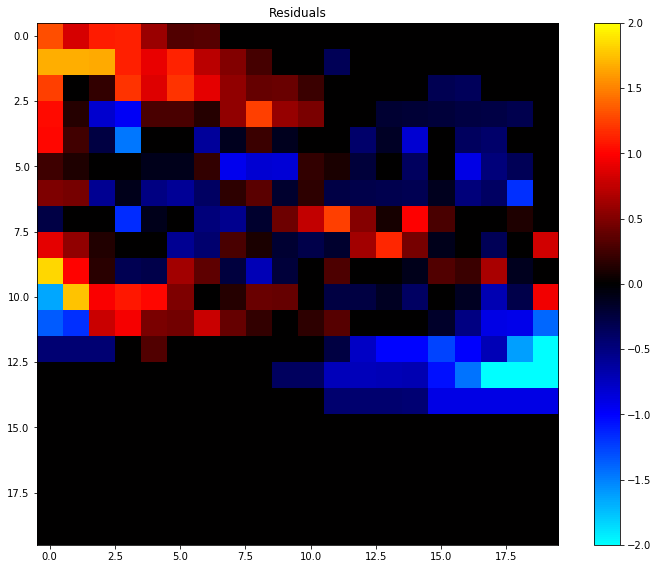

In [7]:
# Plot the residuals
plt.figure(figsize =(12.8,9.6))
plt.title('Residuals')
residual_LUT_norm = (residual_LUT - np.min(residual_LUT)) / (np.max(residual_LUT) - np.min(residual_LUT))
residual_cmap = clr.ListedColormap(residual_LUT_norm)
plt.imshow(np.transpose(residuals), cmap=residual_cmap)
plt.colorbar()
plt.clim(residual_levels[0], residual_levels[1])
plt.show()